In [40]:
import re
from collections import defaultdict
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import patches
import openai
from dotenv import load_dotenv

In [6]:
with open('top_word_feat_inuit_clean.json') as f:
    top_word_feat_inuit = json.load(f)

In [7]:
with open('top_word_feat_inuit2_clean.json') as f:
    top_word_feat_inuit2 = json.load(f)

In [8]:
with open('top_word_feat_american_clean.json') as f:
    top_word_feat_american = json.load(f)

In [9]:
with open('top_word_feat_american2_clean.json') as f:
    top_word_feat_american2 = json.load(f)

In [10]:
with open('top_word_feat_combo_clean.json') as f:
    top_word_feat_combo = json.load(f)

In [11]:
with open('top_word_feat_combo2_clean.json') as f:
    top_word_feat_combo2 = json.load(f)

In [5]:
def count_word_mentions(feature_dict, word_check):
    inuit_count = 0
    inuit_activation_sum = 0.0
    inuit_per_feature = defaultdict(float)

    def normalize(word):
        return re.sub(r'[^\w]', '', word.lower())  # remove punctuation and lowercase

    for feature_idx, word_scores in feature_dict.items():
        for word, activation in word_scores:
            if normalize(word) == word_check:
                inuit_count += 1
                inuit_activation_sum += activation
                inuit_per_feature[feature_idx] += activation

    return inuit_count, inuit_activation_sum, dict(inuit_per_feature)

In [23]:


data_rows = []

def add_entry(llm, dataset, keyword, count, total_act):
    mean_act = total_act / count if count != 0 else 0
    data_rows.append({
        'llm': llm,
        'dataset': dataset,
        'keyword': keyword,
        'feature_label_count': count,
        'total_activation': total_act,
        'mean_activation': mean_act
    })


In [24]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_inuit, feat_word)

add_entry('DistilGPT2', 'Inuit', 'inuit', count, activation_sum)

print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")


'inuit' found 153 times with total activation 528.4373, mean 3.4538
Per-feature activations:
  Feature 59: 0.1280
  Feature 101: 0.0654
  Feature 246: 0.1026
  Feature 397: 0.0703
  Feature 421: 0.1485
  Feature 449: 8.4474
  Feature 668: 2.3590
  Feature 671: 18.4085
  Feature 688: 0.0699
  Feature 698: 0.2907
  Feature 784: 60.8972
  Feature 840: 1.3430
  Feature 1183: 0.7795
  Feature 1214: 0.8976
  Feature 1255: 2.6882
  Feature 1256: 0.0191
  Feature 1264: 0.1369
  Feature 1346: 7.8791
  Feature 1370: 0.0973
  Feature 1409: 18.8589
  Feature 1482: 3.2833
  Feature 1572: 10.2627
  Feature 1612: 70.5787
  Feature 1617: 40.8692
  Feature 1629: 0.3514
  Feature 1639: 1.9552
  Feature 1660: 0.8295
  Feature 1699: 48.9404
  Feature 1783: 3.3634
  Feature 1792: 3.0743
  Feature 1860: 0.0610
  Feature 1947: 0.3388
  Feature 1966: 2.7130
  Feature 2016: 8.7073
  Feature 2038: 59.3562
  Feature 2061: 0.0115
  Feature 2095: 6.0727
  Feature 2112: 9.9916
  Feature 2250: 2.8864
  Feature 2290:

In [25]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_american, feat_word)
add_entry('DistilGPT2', 'American', 'inuit', count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")


'inuit' found 9 times with total activation 90.9372, mean 10.1041
Per-feature activations:
  Feature 397: 33.5955
  Feature 556: 9.4579
  Feature 1070: 8.4749
  Feature 1346: 23.3540
  Feature 1629: 16.0549


In [26]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_combo, feat_word)
add_entry('DistilGPT2', 'Combo', 'inuit', count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'inuit' found 110 times with total activation 486.2560, mean 4.4205
Per-feature activations:
  Feature 246: 0.0726
  Feature 397: 0.0847
  Feature 421: 27.1308
  Feature 449: 2.9187
  Feature 671: 14.9246
  Feature 698: 0.0178
  Feature 784: 54.4518
  Feature 817: 11.8030
  Feature 1217: 18.3555
  Feature 1255: 0.1610
  Feature 1256: 0.0266
  Feature 1346: 1.6011
  Feature 1612: 73.1412
  Feature 1629: 3.0455
  Feature 1699: 43.2302
  Feature 1947: 49.4329
  Feature 2016: 8.4350
  Feature 2038: 47.5017
  Feature 2061: 0.0237
  Feature 2095: 6.3915
  Feature 2112: 42.7720
  Feature 2290: 66.7286
  Feature 2436: 1.9628
  Feature 2570: 0.0067
  Feature 2628: 0.1099
  Feature 2630: 0.7459
  Feature 2670: 11.0507
  Feature 2677: 0.1293


In [27]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_inuit, feat_word)
add_entry('DistilGPT2', 'Inuit', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")


'america' found 7 times with total activation 94.0551, mean 13.4364
Per-feature activations:
  Feature 1294: 16.4916
  Feature 1910: 7.3341
  Feature 2603: 6.5667
  Feature 2923: 48.0507
  Feature 2924: 15.6120


In [28]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_american, feat_word)
add_entry('DistilGPT2', 'American', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'america' found 73 times with total activation 653.2132, mean 8.9481
Per-feature activations:
  Feature 108: 10.5059
  Feature 179: 70.8472
  Feature 403: 16.1052
  Feature 495: 45.6590
  Feature 575: 2.4815
  Feature 712: 79.0902
  Feature 741: 13.8795
  Feature 1026: 86.5714
  Feature 1071: 10.5924
  Feature 1206: 15.5694
  Feature 1323: 0.0772
  Feature 1362: 18.5003
  Feature 1494: 8.8113
  Feature 1600: 13.0444
  Feature 1660: 2.2172
  Feature 1695: 12.8160
  Feature 1819: 4.7805
  Feature 1830: 14.0282
  Feature 1977: 11.7150
  Feature 2038: 106.4692
  Feature 2088: 0.0630
  Feature 2257: 10.8991
  Feature 2489: 8.3564
  Feature 2914: 8.3138
  Feature 2916: 11.2777
  Feature 2923: 58.6060
  Feature 2926: 9.5796
  Feature 2931: 2.3564


In [29]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_combo, feat_word)
add_entry('DistilGPT2', 'Combo', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'america' found 45 times with total activation 426.8524, mean 9.4856
Per-feature activations:
  Feature 108: 12.8710
  Feature 175: 14.8500
  Feature 179: 31.9853
  Feature 712: 25.5435
  Feature 1026: 17.6524
  Feature 1183: 3.5911
  Feature 1200: 36.8348
  Feature 1206: 12.7180
  Feature 1294: 14.2026
  Feature 1324: 9.1759
  Feature 1600: 12.0845
  Feature 1759: 10.7026
  Feature 1819: 5.6552
  Feature 1830: 12.9939
  Feature 2006: 12.4622
  Feature 2088: 113.5654
  Feature 2489: 8.6352
  Feature 2914: 8.6030
  Feature 2923: 62.7257


In [30]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_inuit2, feat_word)
add_entry('GPT-NEO-125M', 'Inuit', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'inuit' found 235 times with total activation 462.9519, mean 1.9700
Per-feature activations:
  Feature 1: 0.0028
  Feature 8: 2.6381
  Feature 69: 28.4694
  Feature 78: 16.3724
  Feature 141: 2.0743
  Feature 147: 17.9195
  Feature 190: 0.1262
  Feature 281: 3.0374
  Feature 334: 4.1154
  Feature 346: 18.1258
  Feature 500: 4.0314
  Feature 507: 12.5485
  Feature 636: 0.0031
  Feature 646: 7.2254
  Feature 669: 4.6789
  Feature 733: 10.1922
  Feature 803: 4.8605
  Feature 825: 2.6358
  Feature 828: 1.9716
  Feature 865: 31.4096
  Feature 866: 5.6711
  Feature 929: 3.8314
  Feature 1085: 29.1561
  Feature 1089: 12.8423
  Feature 1118: 0.0036
  Feature 1143: 0.0056
  Feature 1233: 2.2859
  Feature 1299: 4.1585
  Feature 1372: 1.4901
  Feature 1390: 0.1035
  Feature 1408: 4.9953
  Feature 1429: 7.1455
  Feature 1468: 2.1436
  Feature 1471: 26.9495
  Feature 1482: 0.2565
  Feature 1502: 27.3938
  Feature 1574: 4.1463
  Feature 1626: 0.0195
  Feature 1652: 26.8392
  Feature 1653: 0.2445
  F

In [31]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_american2, feat_word)
add_entry('GPT-NEO-125M', 'American', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'inuit' found 37 times with total activation 127.1214, mean 3.4357
Per-feature activations:
  Feature 141: 1.5459
  Feature 334: 10.1728
  Feature 497: 0.3283
  Feature 733: 10.1510
  Feature 947: 0.5847
  Feature 949: 3.5283
  Feature 1055: 0.5858
  Feature 1089: 7.6496
  Feature 1345: 0.3125
  Feature 1357: 7.5942
  Feature 1431: 0.5699
  Feature 1468: 2.1930
  Feature 1492: 0.2625
  Feature 1502: 18.4662
  Feature 1578: 8.6231
  Feature 1612: 0.5482
  Feature 1930: 0.3191
  Feature 1985: 0.2784
  Feature 2335: 0.2847
  Feature 2411: 13.4379
  Feature 2481: 1.1881
  Feature 2496: 0.3065
  Feature 2697: 0.3153
  Feature 2722: 3.9870
  Feature 2748: 1.8869
  Feature 2782: 0.2926
  Feature 3012: 31.0958
  Feature 3039: 0.2848
  Feature 3066: 0.3282


In [32]:
feat_word = 'inuit'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_combo2, feat_word)
add_entry('GPT-NEO-125M', 'Combo', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'inuit' found 156 times with total activation 398.7399, mean 2.5560
Per-feature activations:
  Feature 1: 3.1197
  Feature 8: 2.0937
  Feature 69: 28.4730
  Feature 78: 22.7558
  Feature 99: 0.0194
  Feature 334: 3.9370
  Feature 500: 1.9877
  Feature 669: 14.1024
  Feature 733: 20.5170
  Feature 865: 28.9976
  Feature 1025: 4.6504
  Feature 1085: 27.1340
  Feature 1089: 13.8050
  Feature 1429: 14.4798
  Feature 1468: 1.4706
  Feature 1471: 28.5191
  Feature 1502: 32.7619
  Feature 1602: 0.2881
  Feature 1652: 8.5971
  Feature 1666: 4.4951
  Feature 1722: 2.8527
  Feature 1966: 11.6279
  Feature 2017: 14.4596
  Feature 2105: 9.1187
  Feature 2213: 1.5782
  Feature 2273: 24.2695
  Feature 2282: 25.5536
  Feature 2385: 5.5115
  Feature 2395: 5.8834
  Feature 2494: 9.3185
  Feature 2679: 6.7560
  Feature 2821: 2.3536
  Feature 2844: 1.5794
  Feature 3012: 15.6729


In [33]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_inuit2, feat_word)
add_entry('GPT-NEO-125M', 'Inuit', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")


'america' found 14 times with total activation 75.8008, mean 5.4143
Per-feature activations:
  Feature 238: 3.9154
  Feature 371: 0.6366
  Feature 513: 5.0450
  Feature 759: 7.1272
  Feature 1255: 31.1121
  Feature 1280: 0.6417
  Feature 1288: 1.2841
  Feature 1627: 6.3657
  Feature 1782: 4.6474
  Feature 1931: 0.7397
  Feature 2527: 14.0107
  Feature 2930: 0.2752


In [34]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_american2, feat_word)
add_entry('GPT-NEO-125M', 'American', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'america' found 165 times with total activation 525.0383, mean 3.1821
Per-feature activations:
  Feature 71: 0.7009
  Feature 116: 0.1264
  Feature 127: 0.0601
  Feature 135: 1.4895
  Feature 136: 6.9567
  Feature 273: 9.7816
  Feature 365: 0.2031
  Feature 415: 45.3909
  Feature 450: 0.6935
  Feature 455: 2.4683
  Feature 489: 4.5304
  Feature 501: 0.9316
  Feature 532: 0.0197
  Feature 575: 3.8617
  Feature 594: 0.0419
  Feature 618: 14.5585
  Feature 642: 0.8138
  Feature 650: 6.4063
  Feature 664: 1.4099
  Feature 677: 0.1932
  Feature 768: 16.2490
  Feature 923: 4.2370
  Feature 945: 5.0161
  Feature 973: 0.7259
  Feature 980: 22.9360
  Feature 1025: 6.1575
  Feature 1033: 2.9976
  Feature 1037: 3.5792
  Feature 1171: 0.1478
  Feature 1176: 1.6173
  Feature 1255: 28.4368
  Feature 1325: 4.2811
  Feature 1371: 3.3775
  Feature 1400: 6.9758
  Feature 1405: 35.4617
  Feature 1438: 1.5806
  Feature 1451: 5.1268
  Feature 1453: 0.0212
  Feature 1531: 1.0404
  Feature 1593: 30.1270
  Fe

In [35]:
feat_word = 'america'
count, activation_sum, per_feature = count_word_mentions(top_word_feat_combo2, feat_word)
add_entry('GPT-NEO-125M', 'Combo', feat_word, count, activation_sum)
print(f"'{feat_word}' found {count} times with total activation {activation_sum:.4f}, mean {activation_sum/count:.4f}")
print("Per-feature activations:")
for k, v in per_feature.items():
    print(f"  Feature {k}: {v:.4f}")

'america' found 78 times with total activation 338.2601, mean 4.3367
Per-feature activations:
  Feature 99: 0.1164
  Feature 136: 12.0763
  Feature 178: 0.1557
  Feature 198: 1.6978
  Feature 371: 2.1443
  Feature 575: 5.0766
  Feature 729: 0.0340
  Feature 768: 16.4390
  Feature 884: 1.0160
  Feature 945: 5.2444
  Feature 980: 4.9607
  Feature 1033: 3.0169
  Feature 1158: 1.6143
  Feature 1176: 1.5357
  Feature 1223: 7.2944
  Feature 1255: 48.8361
  Feature 1400: 3.1499
  Feature 1404: 2.4311
  Feature 1405: 56.0051
  Feature 1888: 2.7559
  Feature 1908: 1.4799
  Feature 2113: 0.0347
  Feature 2148: 35.4791
  Feature 2166: 1.4513
  Feature 2266: 0.0205
  Feature 2297: 1.7554
  Feature 2306: 0.0156
  Feature 2479: 6.9540
  Feature 2527: 34.7322
  Feature 2617: 2.9779
  Feature 2722: 7.1016
  Feature 2809: 46.7834
  Feature 2812: 4.4898
  Feature 2834: 4.5589
  Feature 2848: 5.8374
  Feature 3018: 4.2925
  Feature 3037: 4.6956


In [36]:
df_feat_cts = pd.DataFrame(data_rows)

In [38]:
df_feat_cts

,llm,dataset,keyword,feature_label_count,total_activation,mean_activation
0,DistilGPT2,Inuit,inuit,153,528.437320,3.453839
1,DistilGPT2,American,inuit,9,90.937239,10.104138
2,DistilGPT2,Combo,inuit,110,486.256030,4.420509
3,DistilGPT2,Inuit,america,7,94.055125,13.436446
4,DistilGPT2,American,america,73,653.213214,8.948126
5,DistilGPT2,Combo,america,45,426.852392,9.485609
6,GPT-NEO-125M,Inuit,inuit,235,462.951874,1.970008
7,GPT-NEO-125M,American,inuit,37,127.121380,3.435713
8,GPT-NEO-125M,Combo,inuit,156,398.739871,2.556025
9,GPT-NEO-125M,Inuit,america,14,75.800751,5.414339


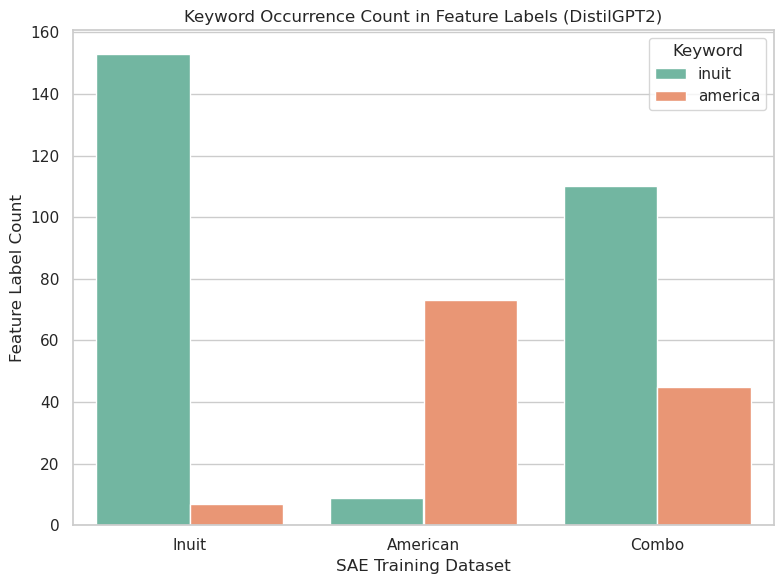

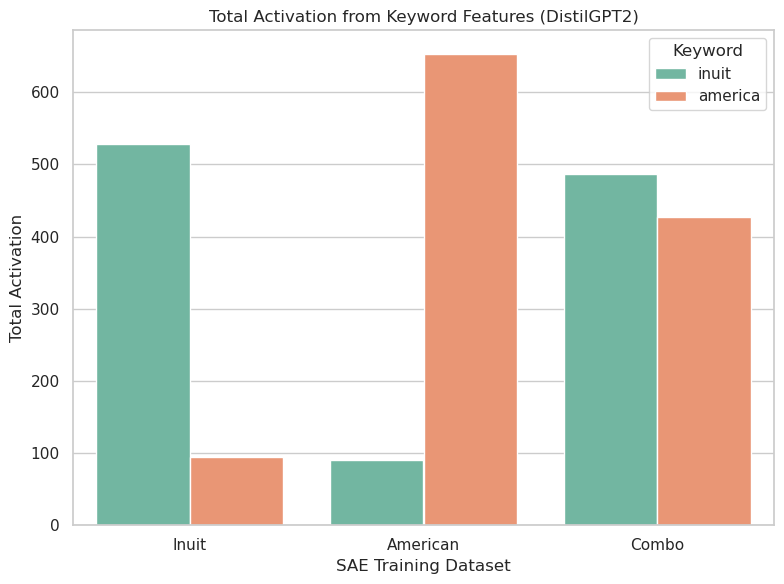

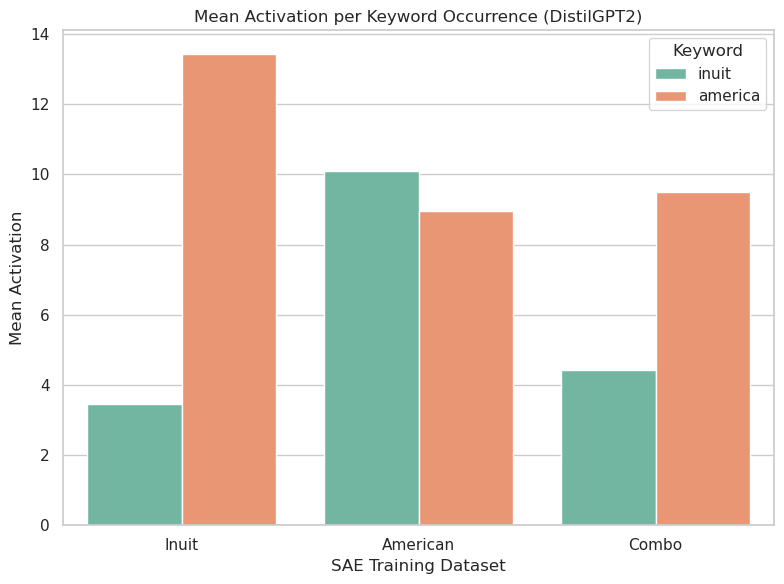

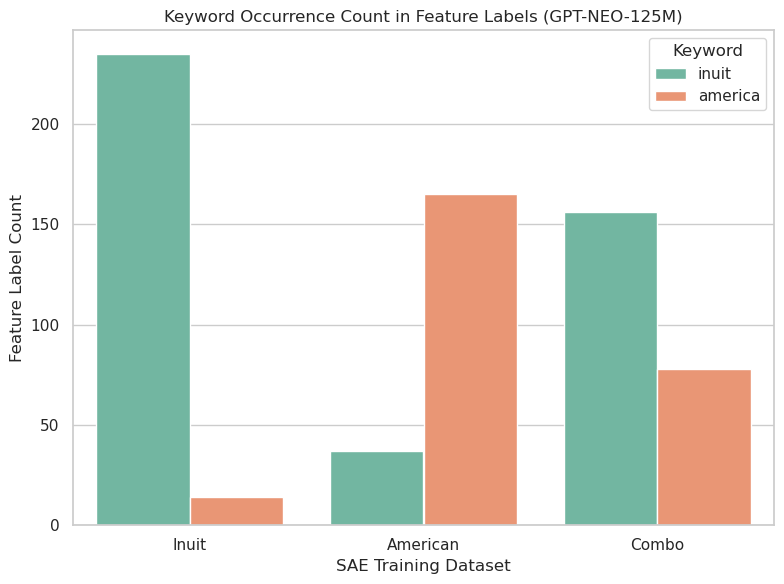

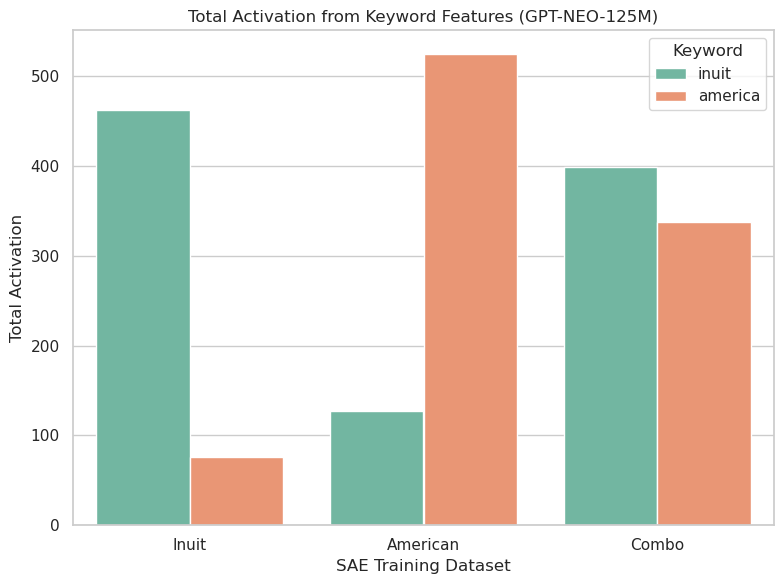

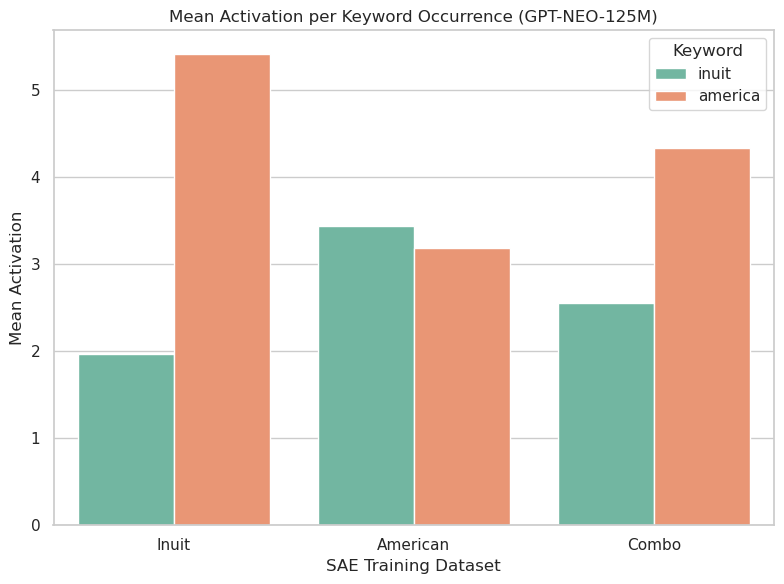

In [43]:


sns.set(style='whitegrid')

def plot_metric(df_feat_cts, llm_name, metric, title):
    df_llm = df_feat_cts[df_feat_cts['llm'] == llm_name]
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=df_llm,
        x='dataset',
        y=metric,
        hue='keyword',
        palette='Set2'
    )
    plt.title(f"{title} ({llm_name})")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xlabel("SAE Training Dataset")
    plt.legend(title="Keyword")
    plt.tight_layout()
    plt.savefig(f'{metric}_{llm_name}')
    plt.show()

metrics = [
    ('feature_label_count', 'Keyword Occurrence Count in Feature Labels'),
    ('total_activation', 'Total Activation from Keyword Features'),
    ('mean_activation', 'Mean Activation per Keyword Occurrence')
]

for llm in df_feat_cts['llm'].unique():
    for metric, title in metrics:
        plot_metric(df_feat_cts, llm, metric, title)


In [64]:
load_dotenv() 

True

In [ ]:

# openai api is not free, this summarizes features
def make_prompt(words_and_scores):
    # drop any '@@@@' entries, round to 1 decimal
    cleaned = [(w.lower(), round(s,1))
               for w,s in words_and_scores
               if "@@@@" not in w.lower()]
    items = [f"{w} ({s})" for w,s in cleaned]
    return f"""\
Here are words (with mean activations) for a latent feature of a sparse autoencoder trained on an LLM:
[{', '.join(items)}]

Give me a concise (ideally one‑ or two‑word), lowercase label that best describes this feature. 
If it’s unclear, respond with "unknown"."""

def label_feature(feature_id, words_and_scores):
    prompt = make_prompt(words_and_scores)
    # print(prompt)
    # return
    resp = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user","content":prompt}],
        temperature=0.0,
        max_tokens=8,
    )
    label = resp.choices[0].message.content.strip().strip('"')
    return feature_id, label


In [ ]:

# variables changed for other datasets, as for saving json below also
labels_combo = {}
for fid, wl in top_word_feat_combo.items():
    _, lab = label_feature(fid, wl)
    # break
    labels_combo[fid] = lab
    # break

print(labels_combo)


{'0': 'history', '3': 'states', '7': 'desire', '9': 'demonstrative pronouns', '13': 'building', '14': 'language features', '15': 'football', '16': 'months', '17': 'decades', '18': 'criteria', '19': 'offensive', '20': 'masculinity', '21': 'survival', '23': 'inuit', '24': 'territorial', '25': 'historical', '26': 'ISBNs', '27': 'john-esque', '29': 'geographical', '30': 'seaside', '32': 'language', '33': 'activism', '34': 'virginia', '36': 'cultures', '37': 'history', '39': 'importance', '40': 'pronouns', '41': 'news', '43': 'language', '44': 'exploration', '46': 'relationships', '47': 'legal rulings', '48': 'knowledge', '50': 'frequency', '51': 'years', '53': 'watercraft', '54': 'ability', '55': 'healthcare', '56': 'justice', '57': 'consistent', '59': 'historical dates', '60': 'yardage', '61': 'unknown', '63': 'socio-cultural', '64': 'snapper', '69': 'arctic wildlife', '70': 'directional', '72': 'warfare', '73': 'sports', '74': 'travel', '75': 'controversial', '76': 'disenfranchisement', 

In [34]:
with open('feature_labels_combo.json', 'w') as json_file:
    json.dump(labels_combo, json_file, indent=4)

In [35]:
labels_inuit2 = {}
for fid, wl in top_word_feat_inuit2.items():
    _, lab = label_feature(fid, wl)
    # break
    labels_inuit2[fid] = lab
    # break

print(labels_inuit2)


{'0': 'time', '1': 'arctic', '2': 'economic trends', '3': 'relative pronouns', '4': 'family', '5': 'relationships', '6': 'questioning', '7': 'popularity', '8': 'inuit', '9': 'family', '10': 'goals', '12': 'coastlines', '13': 'unclear', '14': 'time', '15': 'naming', '16': 'gesture', '17': 'legal', '18': 'geography', '19': 'time-related', '20': 'remote geography', '22': 'connection', '23': 'timeless', '24': 'health', '25': 'elevation', '26': 'storytelling', '27': 'technology', '28': 'skills', '29': 'adverbial', '30': 'mythology', '31': 'language', '32': 'confidentiality', '33': 'literature', '34': 'sled-building', '35': 'inuit', '36': 'arctic', '37': 'well-being', '38': 'animals', '39': 'inuit', '40': 'documented', '41': 'workplaces', '42': 'communication', '43': 'comparison', '44': 'unknown', '45': 'resilience', '46': 'singular', '47': 'history', '48': 'inuit', '49': 'unknown', '50': 'arctic', '51': 'transactions', '52': 'observation', '53': 'time period', '54': 'islands', '55': 'langua

In [ ]:
with open('feature_labels_inuit2.json', 'w') as json_file:
    json.dump(labels_inuit2, json_file, indent=4)

In [ ]:
labels_american2 = {}

In [41]:
labels_american2_copy = labels_american2.copy()

In [ ]:

# max request calls were reached here, so had to continue later
for fid, wl in top_word_feat_american2.items():
    if int(fid) <= int('2130'):
        continue
    else:
        # print(fid)
        # continue
     
        _, lab = label_feature(fid, wl)

        # break
        labels_american2[fid] = lab
        # break




In [61]:
print(labels_american2)

{'0': 'time-related', '1': 'greatness', '2': 'change', '3': 'urbanization', '4': 'waterways', '5': 'history', '6': 'science', '7': 'urban wildlife', '8': 'funding', '9': 'travel', '10': 'male names', '11': 'business', '12': 'coastline', '13': 'inequality', '14': 'permission', '15': 'naming', '16': 'freedom', '17': 'geography', '18': 'geography', '19': 'numbers', '20': 'geographical', '22': 'emotional', '23': 'time', '24': 'remaining', '25': 'budget', '26': 'politics', '27': 'civil war', '28': 'resilience', '29': 'legally', '30': 'government', '31': 'indigenous', '32': 'communication', '33': 'numbers', '34': 'geographic', '35': 'numbers', '36': 'spanish', '37': 'historical landmarks', '38': 'sports', '39': 'landforms', '40': 'actions', '41': 'achievement', '42': 'pattern', '43': 'conditionals', '44': 'multilingualism', '45': 'improvement', '46': 'race', '47': 'money', '48': 'travel', '49': 'geography', '50': 'names', '51': 'events', '52': 'perception', '53': 'events', '54': 'directions'

In [38]:
print(labels_american2)

{'0': 'time-related', '1': 'greatness', '2': 'change', '3': 'urbanization', '4': 'waterways', '5': 'history', '6': 'science', '7': 'urban wildlife', '8': 'funding', '9': 'travel', '10': 'male names', '11': 'business', '12': 'coastline', '13': 'inequality', '14': 'permission', '15': 'naming', '16': 'freedom', '17': 'geography', '18': 'geography', '19': 'numbers', '20': 'geographical', '22': 'emotional', '23': 'time', '24': 'remaining', '25': 'budget', '26': 'politics', '27': 'civil war', '28': 'resilience', '29': 'legally', '30': 'government', '31': 'indigenous', '32': 'communication', '33': 'numbers', '34': 'geographic', '35': 'numbers', '36': 'spanish', '37': 'historical landmarks', '38': 'sports', '39': 'landforms', '40': 'actions', '41': 'achievement', '42': 'pattern', '43': 'conditionals', '44': 'multilingualism', '45': 'improvement', '46': 'race', '47': 'money', '48': 'travel', '49': 'geography', '50': 'names', '51': 'events', '52': 'perception', '53': 'events', '54': 'directions'

In [62]:
with open('feature_labels_american2.json', 'w') as json_file:
    json.dump(labels_american2, json_file, indent=4)

In [55]:
labels_combo2 = {}

In [56]:

for fid, wl in top_word_feat_combo2.items():
    _, lab = label_feature(fid, wl)
    # break
    labels_combo2[fid] = lab
    # break

print(labels_combo2)


{'0': 'time-related', '1': 'mountains', '2': 'change', '3': 'interrogative', '4': 'community', '5': 'relationships', '6': 'language', '7': 'popularity', '8': 'exploration', '9': 'feminine', '10': 'goal', '12': 'coastlines', '13': 'narrative', '14': 'language', '15': 'naming', '16': 'freedom', '17': 'language', '18': 'geography', '19': 'numbers', '20': 'geographical', '22': 'relationships', '23': 'time', '24': 'peaceful', '25': 'economic', '26': 'nationality', '27': 'region', '28': 'transformations', '29': 'adverbial', '30': 'leadership', '31': 'indigenous', '32': 'sharing', '33': 'numbers', '34': 'landforms', '35': 'unknown', '36': 'arctic', '37': 'improvement', '38': 'sports', '39': 'mountains', '40': 'processing', '41': 'goal-oriented', '42': 'community', '43': 'conditional', '44': 'unknown', '45': 'efficiency', '46': 'singular', '47': 'multiplication', '48': 'indigenous', '49': 'tropical', '50': 'saints', '51': 'protection', '52': 'landscape', '53': 'historical', '54': 'direction', 

In [50]:
print(labels_combo2)

{'0': 'time-related', '1': 'mountains', '2': 'change', '3': 'interrogative', '4': 'community', '5': 'relationships', '6': 'criteria', '7': 'popularity', '8': 'exploration', '9': 'feminine', '10': 'goal', '12': 'coastline', '13': 'observation', '14': 'language', '15': 'naming', '16': 'freedom', '17': 'language', '18': 'geography', '19': 'numbers', '20': 'geographical', '22': 'relationships', '23': 'time', '24': 'peaceful', '25': 'economic', '26': 'nationality', '27': 'region', '28': 'transformation', '29': 'adverbial', '30': 'leadership', '31': 'indigenous', '32': 'sharing', '33': 'numbers', '34': 'landforms', '35': 'unknown', '36': 'arctic', '37': 'improvement', '38': 'sports', '39': 'mountains', '40': 'operations', '41': 'goal-oriented', '42': 'community', '43': 'conditional', '44': 'unknown', '45': 'efficiency', '46': 'singular', '47': 'multiplication', '48': 'indigenous', '49': 'tropical', '50': 'saints', '51': 'protection', '52': 'landscape', '53': 'historical', '54': 'direction', 

In [57]:
with open('feature_labels_combo2.json', 'w') as json_file:
    json.dump(labels_combo2, json_file, indent=4)

In [65]:
with open('feature_labels_inuit.json') as f:
    feat_labs_inuit = json.load(f)

with open('feature_labels_american.json') as f:
    feat_labs_american = json.load(f)

with open('feature_labels_combo.json') as f:
    feat_labs_combo = json.load(f)

with open('feature_labels_inuit2.json') as f:
    feat_labs_inuit2 = json.load(f)

with open('feature_labels_american2.json') as f:
    feat_labs_american2 = json.load(f)

with open('feature_labels_combo2.json') as f:
    feat_labs_combo2 = json.load(f)






In [69]:
labels_dict = {}
labels_dict[0] = list(feat_labs_inuit.values())
labels_dict[1] = list(feat_labs_american.values())
labels_dict[2] = list(feat_labs_combo.values())
labels_dict[3] = list(feat_labs_inuit2.values())
labels_dict[4] = list(feat_labs_american2.values())
labels_dict[5] = list(feat_labs_combo2.values())

In [71]:
for k, v in labels_dict.items():
    print(len(v))

1815
1798
1895
3038
3004
3035


In [ ]:
from collections import Counter
# count repeated words
compact_labels_dict = {k: dict(Counter(v)) for k, v in labels_dict.items()}



In [76]:
for k, v in compact_labels_dict.items():
    print(len(v))

752
713
862
984
929
1081


In [77]:
compact_labels_dict

{0: {'nordic': 1,
  'arctic': 49,
  'comparison': 11,
  'here': 1,
  'language': 97,
  'unknown': 99,
  'abbreviations': 1,
  'inuit': 147,
  'writing': 3,
  'masculinity': 1,
  'resilience': 1,
  'achievement': 2,
  'nature': 1,
  'book codes': 1,
  'siberian': 1,
  'crafting': 3,
  'linguistics': 9,
  'controversial': 1,
  'historical': 28,
  'language evolution': 7,
  'importance': 3,
  'pronouns': 12,
  'technology': 2,
  'royalty': 1,
  'belief': 2,
  'communication': 10,
  'frequency': 6,
  'years': 4,
  'watercraft': 1,
  'healthcare': 7,
  'greenlandic': 5,
  'community-oriented': 1,
  'socio-cultural': 1,
  'social': 1,
  'southern': 1,
  'adequacy': 1,
  'celestial': 1,
  'travel': 3,
  'comprehensive': 1,
  'health issues': 1,
  'utilization': 3,
  'returning': 1,
  'history': 19,
  'medical terms': 1,
  'dorset': 4,
  'animals': 8,
  'whistling': 1,
  'indigenous': 15,
  'waterfront': 1,
  'new york': 1,
  'logic': 2,
  'uncertainty': 8,
  'outdoorsmen': 1,
  'departure': 1

In [142]:
counts_inuit = 0
counts_american = 0
for k, v in compact_labels_dict.items():
    # print(v)
    # break
    for k2, v2 in v.items():
        if 'inuit' in k2:
            counts_inuit += v2
        if 'america' in k2:
            counts_american += v2

In [143]:
counts_inuit

565

In [144]:
counts_american

151

In [ ]:

# similar words put in categories
response = openai.ChatCompletion.create(
    model="gpt-4-1106-preview",
    messages=[
        {
            "role": "system",
            "content": (
                "You are an assistant that consolidates feature labels across multiple datasets. "
                "Each dataset has a dictionary of feature labels and their counts. "
                "Many labels are semantically similar or synonymous. Your task is to normalize the labels by "
                "merging similar ones under a single lowercase label. "
                "For example, merge 'language', 'language evolution', and 'linguistics' as 'language'. "
                "Sum the counts for all merged labels, per dataset."
            )
        },
        {
            "role": "user",
            "content": (
                "Here is a dictionary where keys are dataset numbers (0 to 5), and values are dictionaries. "
                "Each of those maps labels to their count in that dataset. "
                "Please return a new dictionary in the exact same structure — a top-level dictionary with dataset keys "
                "mapping to sub-dictionaries of labels and counts. "
                "Only include labels present in each dataset, and ensure merged labels are consistent across all datasets. "
                "Use all lowercase labels, and be concise.\n\n"
                f"{json.dumps(compact_labels_dict)}"
            )
        }
    ],
    temperature=0,
    max_tokens=4096
)





In [80]:
label_counts = response['choices'][0]['message']['content']
print(label_counts)

Here is the normalized dictionary with merged labels and summed counts:

```json
{
  "0": {
    "achievement": 2,
    "animals": 8,
    "arctic": 52,
    "arctic culture": 8,
    "arctic wildlife": 19,
    "canadian": 8,
    "communication": 10,
    "comparison": 11,
    "culture": 25,
    "education": 11,
    "exploration": 11,
    "family": 7,
    "geography": 9,
    "greenlandic": 5,
    "healthcare": 7,
    "history": 19,
    "inuit": 157,
    "language": 113,
    "linguistics": 9,
    "location": 8,
    "movement": 6,
    "names": 13,
    "numbers": 17,
    "polar": 5,
    "prepositions": 11,
    "pronouns": 12,
    "relationships": 8,
    "seasons": 3,
    "technology": 2,
    "time": 16,
    "travel": 3,
    "watercraft": 1,
    "whaling": 5
  },
  "1": {
    "achievement": 2,
    "animals": 5,
    "arctic": 2,
    "communication": 3,
    "comparison": 11,
    "conflict": 9,
    "culture": 7,
    "education": 9,
    "exploration": 32,
    "family": 2,
    "geography": 44,
    "h

In [85]:

# regex to capture multiline JSON block between ```json and ```
match = re.search(r"```json\n(.*?)```", label_counts, re.DOTALL)

if match:
    json_str = match.group(1)
    data_labels = json.loads(json_str)
    print("Successfully loaded JSON!")
else:
    print("Could not extract JSON block.")


Successfully loaded JSON!


In [86]:
print(json_str)

{
  "0": {
    "achievement": 2,
    "animals": 8,
    "arctic": 52,
    "arctic culture": 8,
    "arctic wildlife": 19,
    "canadian": 8,
    "communication": 10,
    "comparison": 11,
    "culture": 25,
    "education": 11,
    "exploration": 11,
    "family": 7,
    "geography": 9,
    "greenlandic": 5,
    "healthcare": 7,
    "history": 19,
    "inuit": 157,
    "language": 113,
    "linguistics": 9,
    "location": 8,
    "movement": 6,
    "names": 13,
    "numbers": 17,
    "polar": 5,
    "prepositions": 11,
    "pronouns": 12,
    "relationships": 8,
    "seasons": 3,
    "technology": 2,
    "time": 16,
    "travel": 3,
    "watercraft": 1,
    "whaling": 5
  },
  "1": {
    "achievement": 2,
    "animals": 5,
    "arctic": 2,
    "communication": 3,
    "comparison": 11,
    "conflict": 9,
    "culture": 7,
    "education": 9,
    "exploration": 32,
    "family": 2,
    "geography": 44,
    "history": 37,
    "language": 26,
    "location": 9,
    "movement": 5,
    "names

In [87]:
with open('label_counts.json', 'w') as json_file:
    json.dump(data_labels, json_file, indent=4)

In [91]:
for k, v in data_labels.items():
    print(len(v))

33
27
31
31
27
33


In [96]:

dataset_names = ['DistilGPT2_Inuit', 'DistilGPT2_American', 'DistilGPT2_combo', 'gpt-neo-125M_Inuit', 'gpt-neo-125M_American', 'gpt-neo-125M_combo']



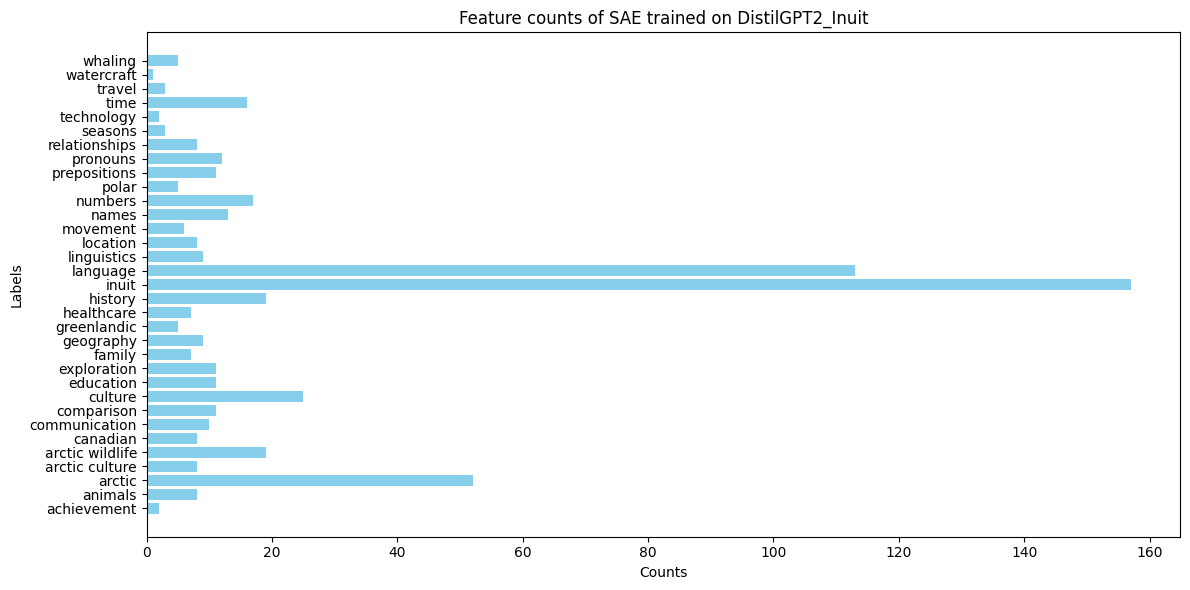

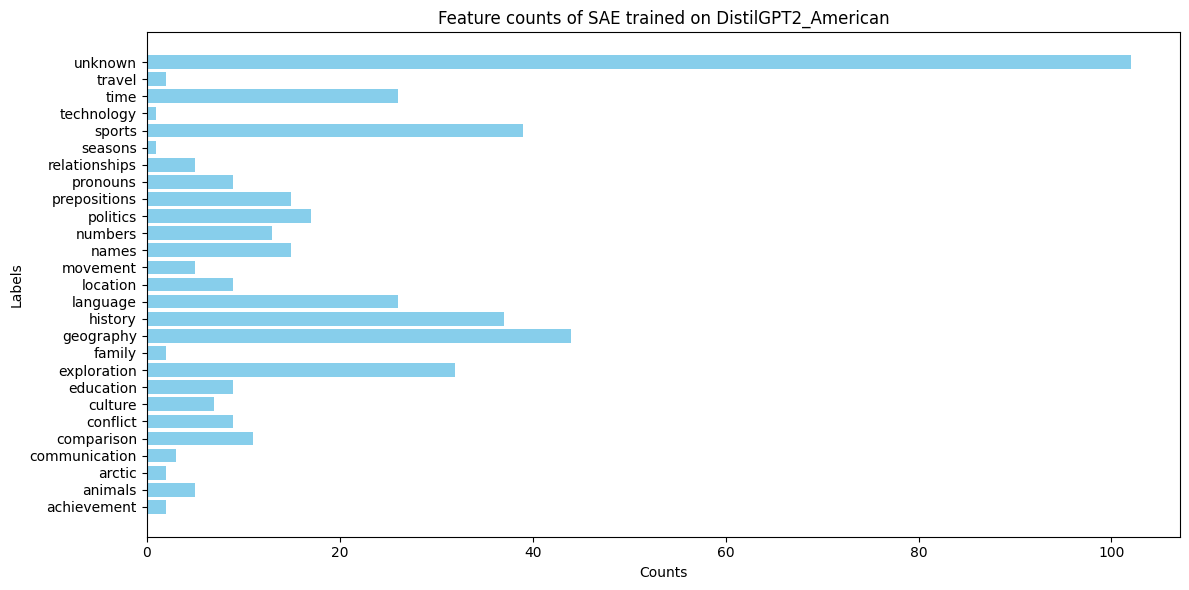

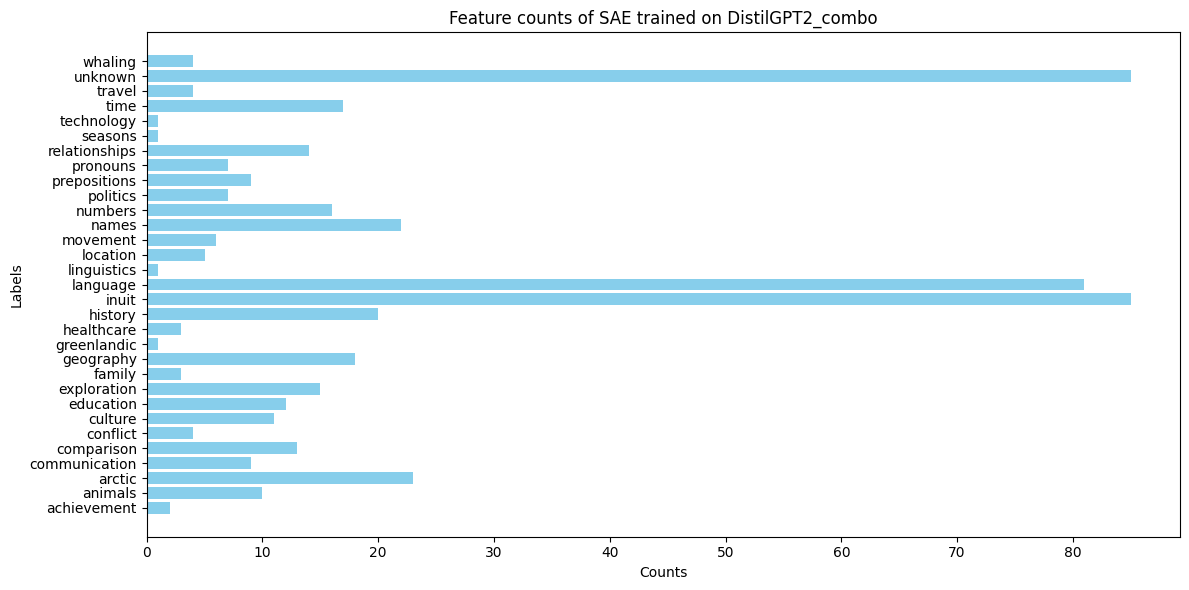

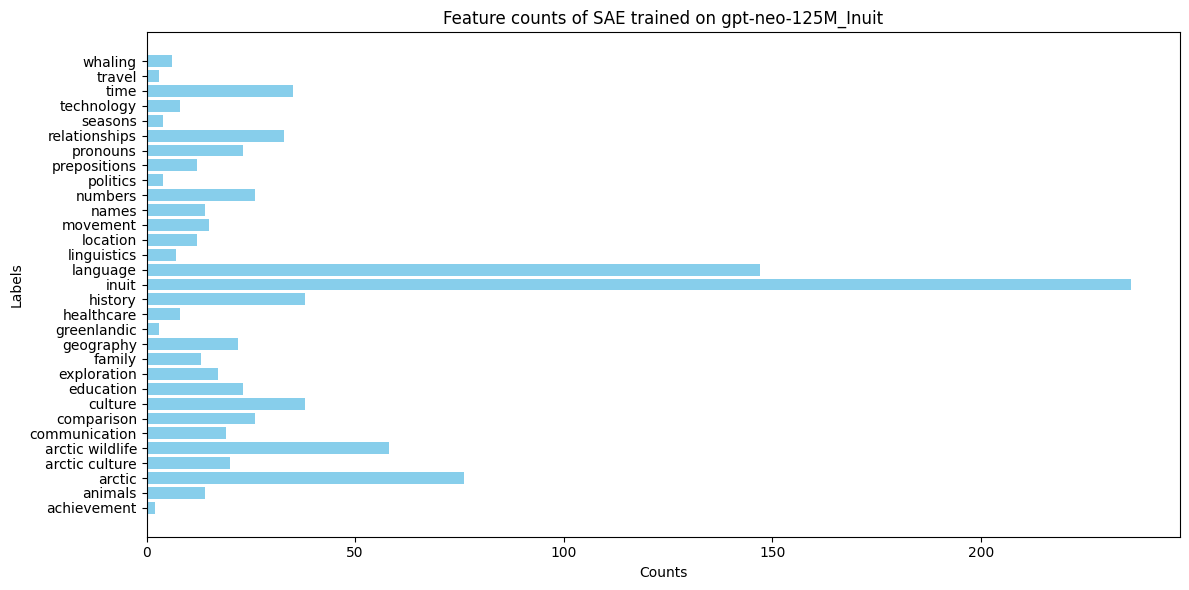

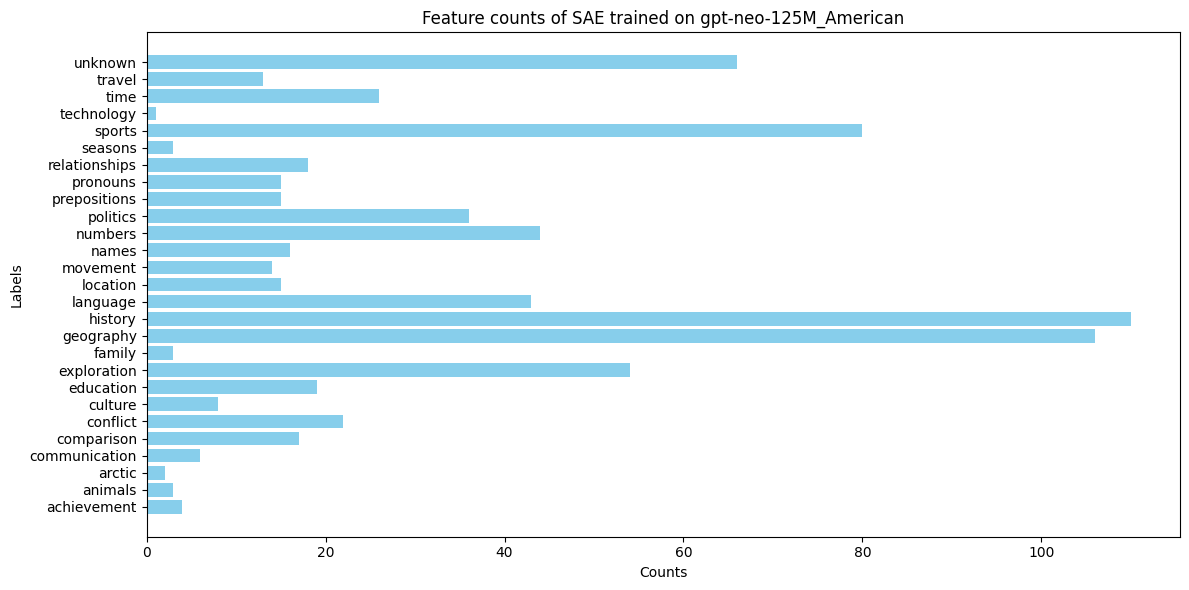

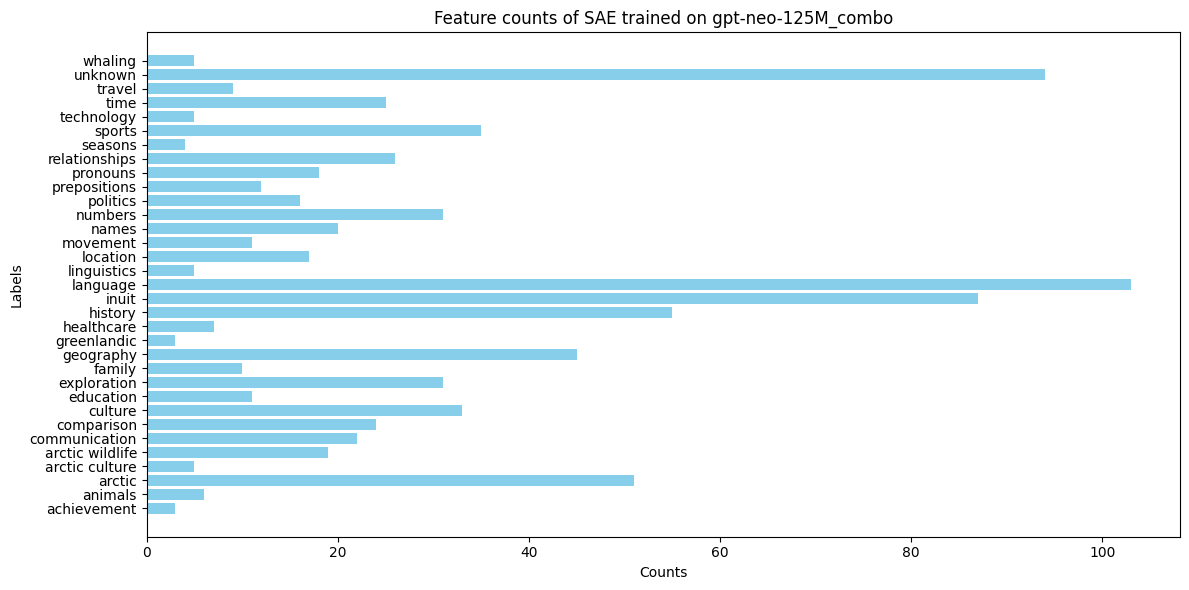

In [97]:


for dataset_id, label_counts in data_labels.items():
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    plt.figure(figsize=(12, 6))
    plt.barh(labels, counts, color='skyblue')
    plt.title(f"Feature counts of SAE trained on {dataset_names[int(dataset_id)]}")
    plt.xlabel("Counts")
    plt.ylabel("Labels")
    plt.tight_layout()
    plt.show()


In [98]:
data_labels

{'0': {'achievement': 2,
  'animals': 8,
  'arctic': 52,
  'arctic culture': 8,
  'arctic wildlife': 19,
  'canadian': 8,
  'communication': 10,
  'comparison': 11,
  'culture': 25,
  'education': 11,
  'exploration': 11,
  'family': 7,
  'geography': 9,
  'greenlandic': 5,
  'healthcare': 7,
  'history': 19,
  'inuit': 157,
  'language': 113,
  'linguistics': 9,
  'location': 8,
  'movement': 6,
  'names': 13,
  'numbers': 17,
  'polar': 5,
  'prepositions': 11,
  'pronouns': 12,
  'relationships': 8,
  'seasons': 3,
  'technology': 2,
  'time': 16,
  'travel': 3,
  'watercraft': 1,
  'whaling': 5},
 '1': {'achievement': 2,
  'animals': 5,
  'arctic': 2,
  'communication': 3,
  'comparison': 11,
  'conflict': 9,
  'culture': 7,
  'education': 9,
  'exploration': 32,
  'family': 2,
  'geography': 44,
  'history': 37,
  'language': 26,
  'location': 9,
  'movement': 5,
  'names': 15,
  'numbers': 13,
  'politics': 17,
  'prepositions': 15,
  'pronouns': 9,
  'relationships': 5,
  'seaso

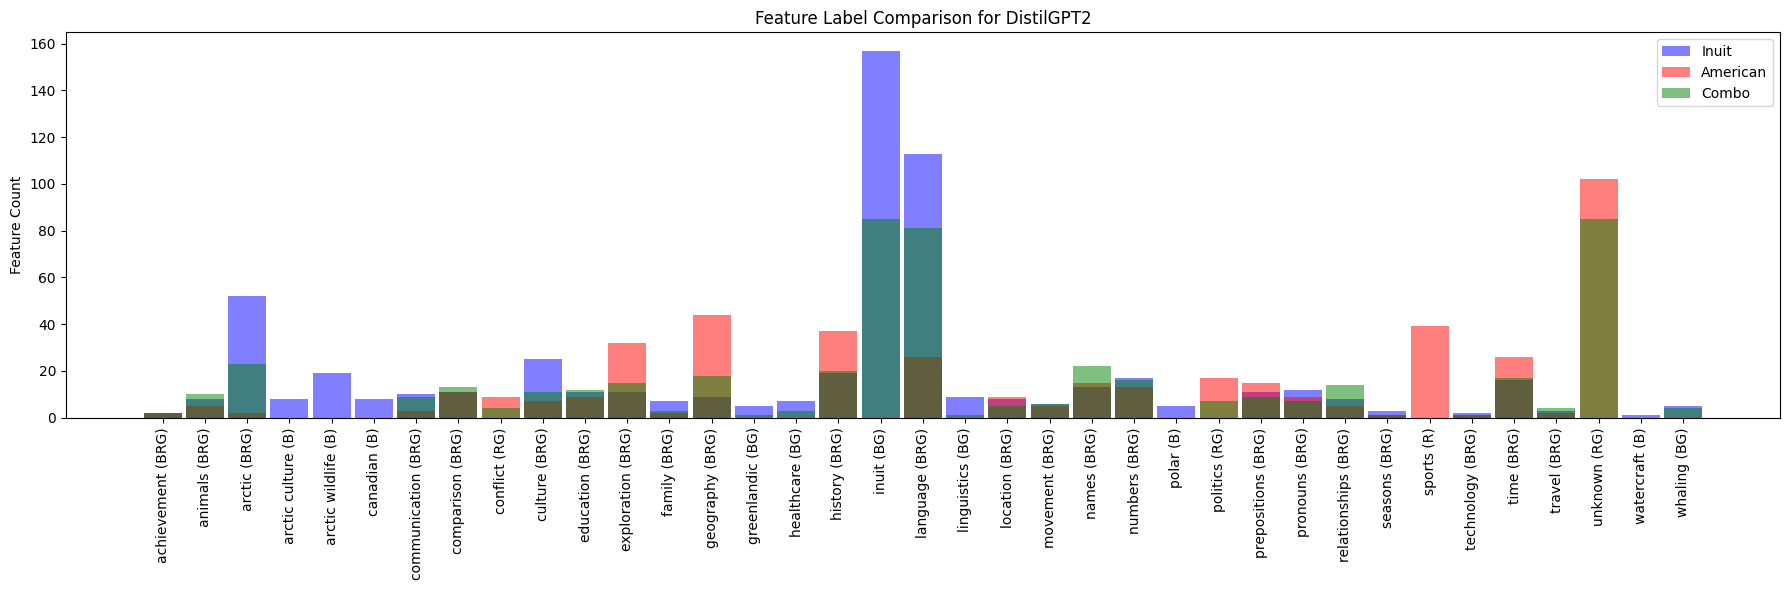

In [ ]:


dataset_names = ['Inuit', 'American', 'Combo']
datasets = [data_labels['0'], data_labels['1'], data_labels['2']]  

# union of all labels across the three datasets
all_labels = sorted(set().union(*[d.keys() for d in datasets]))

data = []
for d in datasets:
    data.append([d.get(label, 0) for label in all_labels])
data = np.array(data)

x = np.arange(len(all_labels))
width = 0.9  

colors = ['blue', 'red', 'green']
alphas = [0.5, 0.5, 0.5]

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.bar(x, data[i], width=width, alpha=alphas[i], color=colors[i], label=dataset_names[i])


label_presence = []
for label in all_labels:
    presence = [i for i, d in enumerate(datasets) if label in d]
    label_presence.append(presence)

def colored_label(label, presence):
    colors = ['blue', 'red', 'green']
    dots = ''.join([f'\u25CF' for _ in presence])  
    return f"{label} ({''.join([colors[i][0].upper() for i in presence])})"

xtick_labels = [colored_label(label, presence) for label, presence in zip(all_labels, label_presence)]

plt.xticks(x, xtick_labels, rotation=90)

plt.ylabel('Feature Count')
plt.title('Feature Label Comparison for DistilGPT2')
plt.legend()
plt.tight_layout()
plt.show()


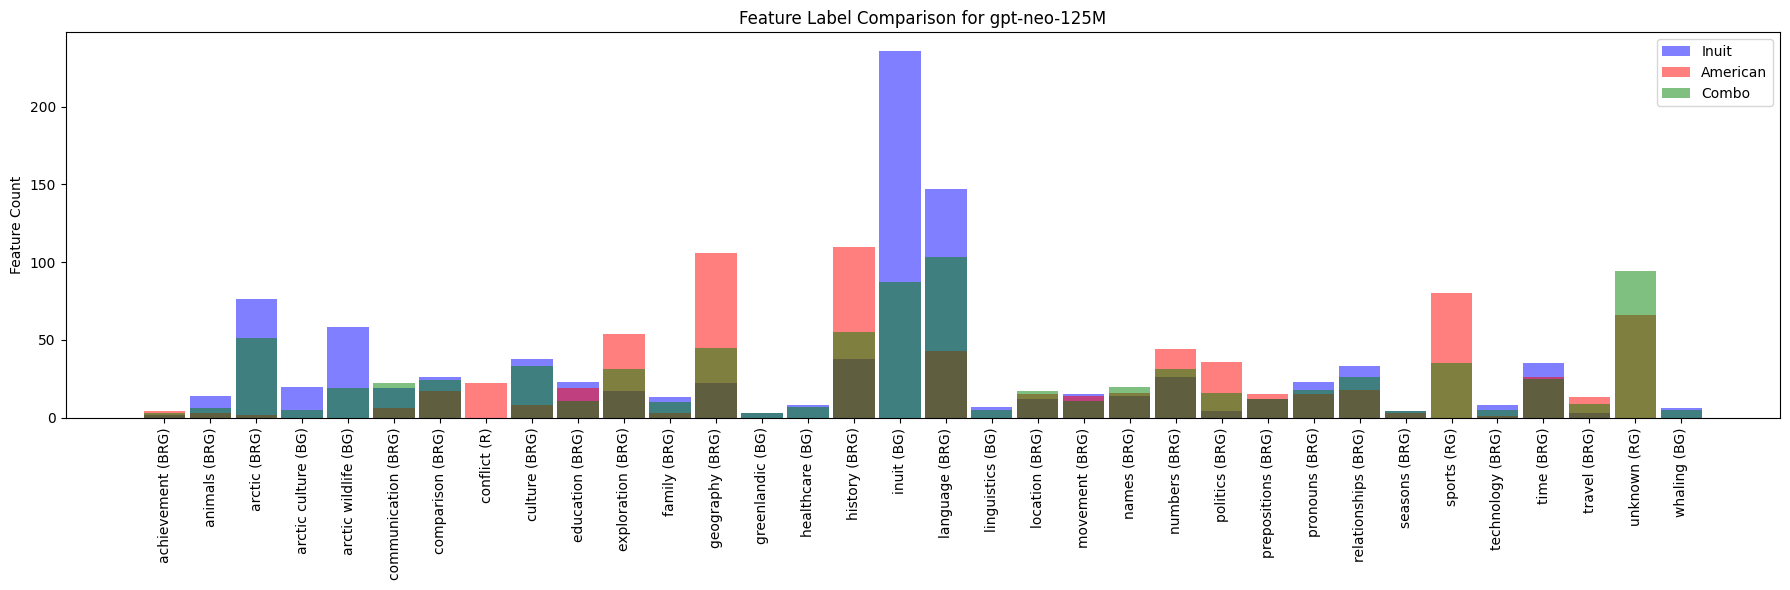

In [ ]:


dataset_names = ['Inuit', 'American', 'Combo']
datasets = [data_labels['3'], data_labels['4'], data_labels['5']]  

# union of all labels across the three datasets
all_labels = sorted(set().union(*[d.keys() for d in datasets]))

data = []
for d in datasets:
    data.append([d.get(label, 0) for label in all_labels])
data = np.array(data)

x = np.arange(len(all_labels))
width = 0.9  

colors = ['blue', 'red', 'green']
alphas = [0.5, 0.5, 0.5]

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.bar(x, data[i], width=width, alpha=alphas[i], color=colors[i], label=dataset_names[i])

label_presence = []
for label in all_labels:
    presence = [i for i, d in enumerate(datasets) if label in d]
    label_presence.append(presence)

def colored_label(label, presence):
    colors = ['blue', 'red', 'green']
    dots = ''.join([f'\u25CF' for _ in presence])  
    return f"{label} ({''.join([colors[i][0].upper() for i in presence])})"

xtick_labels = [colored_label(label, presence) for label, presence in zip(all_labels, label_presence)]

plt.xticks(x, xtick_labels, rotation=90)

plt.ylabel('Feature Count')
plt.title('Feature label comparison for gpt-neo-125M')
plt.legend()
plt.tight_layout()
plt.show()


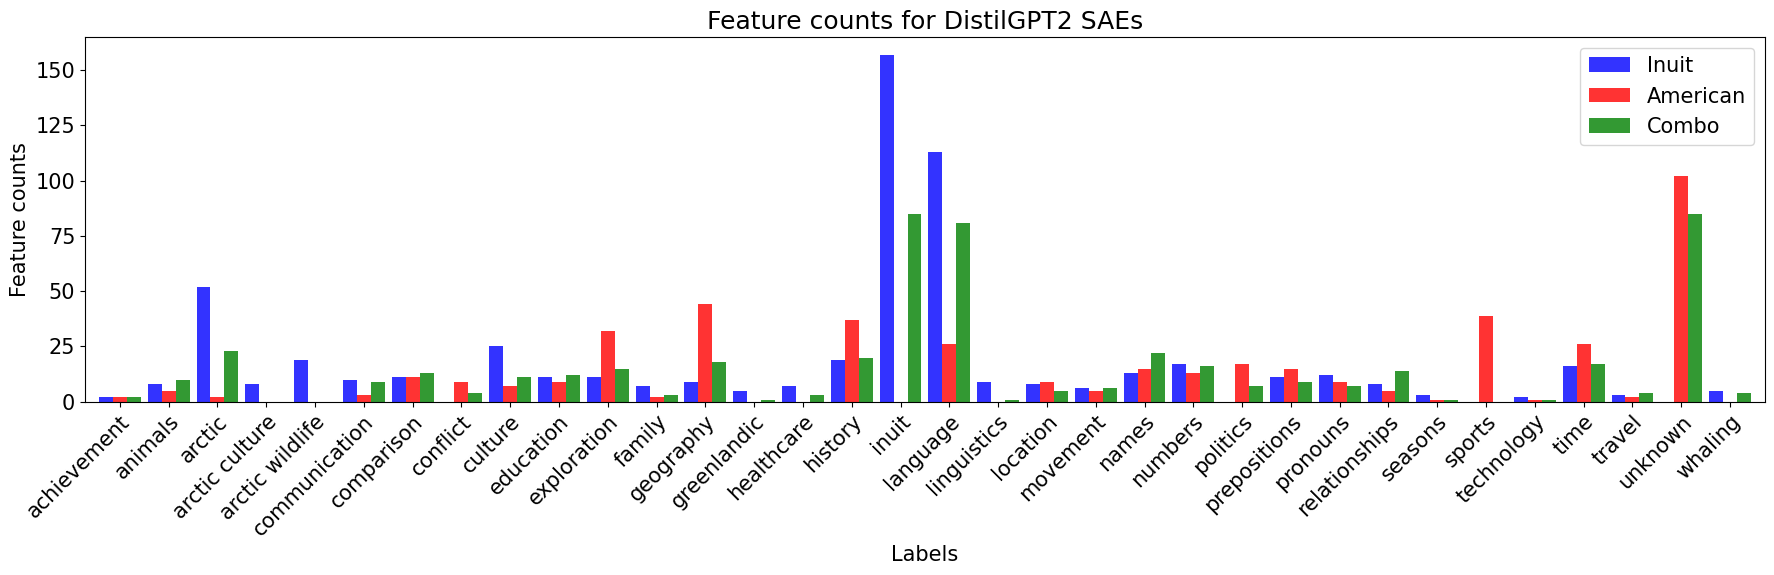

In [146]:

plt.rcParams.update({'font.size': 15})
labels = list(all_labels)
n_labels = len(labels)

datasets = [data_labels['0'], data_labels['1'], data_labels['2']] # DistilGPT2_Inuit, _American, _Combo
colors = ['blue', 'red', 'green']
dataset_names = ['Inuit', 'American', 'Combo']

x = np.arange(n_labels)

fig, ax = plt.subplots(figsize=(18, 6))

# spacing between grouped labels 
group_spacing = 0.7
x = np.arange(len(labels)) * group_spacing

bar_width = 0.2
offsets = [-bar_width, 0, bar_width]  

for i, dataset in enumerate(datasets):
    counts = [dataset.get(label, 0) for label in labels]
    ax.bar(x + offsets[i], counts, width=bar_width, label=dataset_names[i], color=colors[i], alpha=0.8)


ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')
ax.set_xlim(min(x) - 0.5, max(x) + 0.5)

ax.set_ylabel("Feature counts")
ax.set_xlabel("Labels")
ax.set_title("Feature counts for DistilGPT2 SAEs")
ax.legend()

plt.tight_layout()
plt.show()


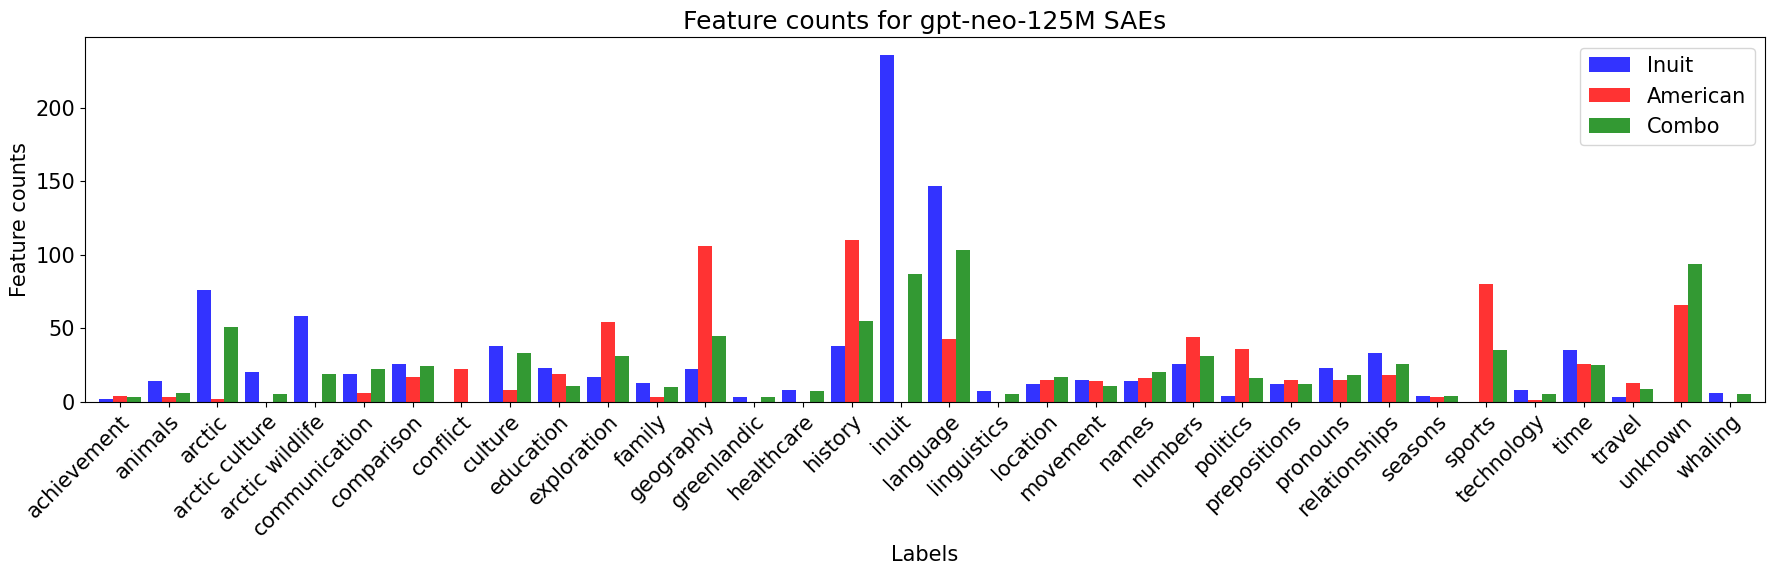

In [147]:


labels = list(all_labels)
n_labels = len(labels)

datasets = [data_labels['3'], data_labels['4'], data_labels['5']] 
colors = ['blue', 'red', 'green']
dataset_names = ['Inuit', 'American', 'Combo']

x = np.arange(n_labels)

fig, ax = plt.subplots(figsize=(18, 6))

group_spacing = 0.7
x = np.arange(len(labels)) * group_spacing

bar_width = 0.2
offsets = [-bar_width, 0, bar_width]  

for i, dataset in enumerate(datasets):
    counts = [dataset.get(label, 0) for label in labels]
    ax.bar(x + offsets[i], counts, width=bar_width, label=dataset_names[i], color=colors[i], alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

ax.set_xlim(min(x) - 0.5, max(x) + 0.5)

ax.set_ylabel("Feature counts")
ax.set_xlabel("Labels")
ax.set_title("Feature counts for gpt-neo-125M SAEs")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
list(top_word_feat_american.items())[2]

('7',
 [['gained', 30.06658935546875],
  ['attain', 27.227394104003906],
  ['gaining', 26.597000122070312],
  ['seek', 24.64051628112793],
  ['sought', 24.37030029296875],
  ['regained', 22.118497848510742],
  ['seeking', 21.621841430664062],
  ['draws', 21.114931106567383],
  ['reached', 19.599224090576172],
  ['reach', 19.423049926757812],
  ['secured', 19.1229305267334],
  ['reaching', 19.087810516357422],
  ['gains', 18.972421646118164],
  ['achieved', 18.878755569458008],
  ['derives', 18.690704345703125],
  ['achieve', 18.191070556640625],
  ['drawn', 18.133087158203125],
  ['drawing', 17.223697662353516],
  ['derive', 17.03902816772461],
  ['won', 17.01606559753418]])